# Differential Equations

Often times in physics we're interested in answering questions related to the rate of change of a function. Take Newton's second law:

$ \vec{F} = m \frac{d^2 \vec{x}}{dt^2} $

Or re-arranged:

$ \frac{d^2 \vec{x}}{dt^2} = \frac{\vec{F}}{m} $

Usually we have a model or an equation for what $\vec{F}$ should be. As an example we might use Hooke's law, where:

$ F = -kx $

So Newton's law becomes:

$ \frac{d^2 x}{dt^2} =  - \frac{k}{m} x $

The problem we want an answer to is the following: what functions $x(t)$ satisfy this equation?
Ie what function is equal to its second derivative times a constant.

If we can solve this problem, then we will know the dynamics of the system for all times. You will learn, how to solve many of these systems by hand to obtain closed form solutions (stuff you can write down on paper), but there are many more systems that do not have closed form solutions, or whose solutions are too complicated, or in some rare cases you might not have an equation for the derivative.

## A first order linear differential equation

First let's define a first order (only goes up to the first derivative) ordinary differential equation.

$ \frac{d y}{d x} = f(x,y) $

Where $f(x,y)$ encapsulates your derivative, or we say that $f$ is the first derivative of y.


## Euler's Method

Euler came up with a really easy way to approximate solutions to these problems. First we need to realize that we have access to the slope of the function at all points. If we know at least one ordered pair (x,y), then we can draw the tangent line at that point. We can take this line to be a local linear approximation to the function we are looking for. We use this approximation to find a new point, usually at some distance $\Delta x$, and repeat.

In summary:

1. Calculate $f(x_n, y_n)$, the slope at point $(x_n, y_n)$
2. Build the linear approximation, $y_{n+1} = y_n + f(x_n, y_n)\cdot\Delta x$
3. Store the values of $y_{n+1}$ and $x_{n+1} = x_n + \Delta x$
4. Relabel all n+1 terms to n, and repeat from Step 1, until you have covered the x range you need

## Toy Problem

Now we define our toy problem:

$ \frac{d y}{d x} = e^x $

The answer to this problem should be obvious: $y=e^x + C$ satisfies the equation.
Let's try to find an approximate solution to this problem using Euler's method.

In [21]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

def f(y,x):
    return np.exp(x)

def eulerStep(func, x_n, y_n, dx):
    return y_n + func(y_n, x_n)*dx

# Our intial conditions
x_0 = 0.
y_0 = 1.

# Our step size
dx = 1

def eulerSolver(f, x_0, y_0, dx):
    # We will solve until we have covered the range from 0 to 5
    xs = [x_0]  # Notice how we start with the initial conditions in the lists
    ys = [y_0]
    while xs[-1]<5:
        # Get the values now
        x = xs[-1]
        y = ys[-1]
        # Get the new values
        new_y = eulerStep(f, x, y, dx)
        new_x = x + dx
        # Store the new values, at the end of the list
        xs.append(new_x)
        ys.append(new_y)
        
    return xs,ys

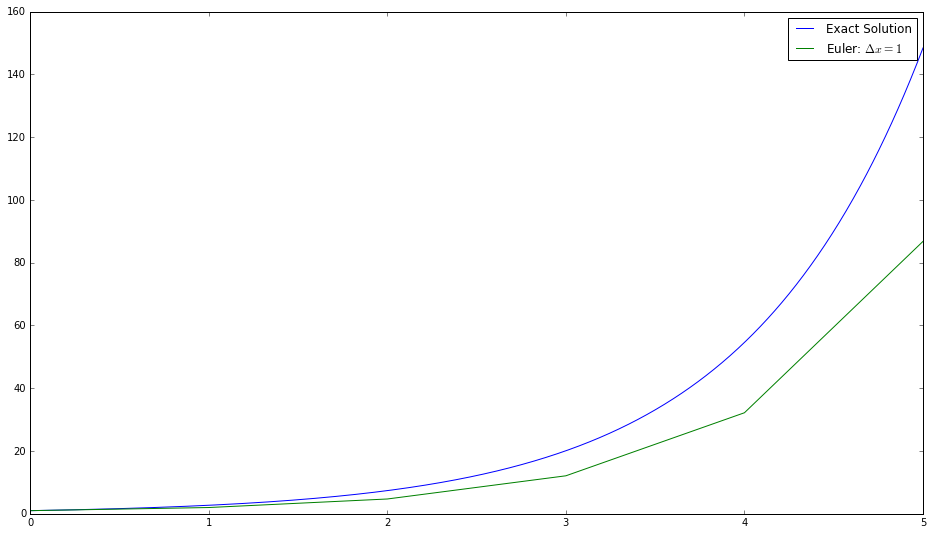

In [23]:
# Now we want to plot the real solution, which is f conviniently
exactXs = np.linspace(0,5,1000)
exactYs = f(None, exactXs)
plt.figure(figsize=(16,9), dpi=100)
plt.plot(exactXs, exactYs, label='Exact Solution')

xs,ys = eulerSolver(f, x_0, y_0, dx)
plt.plot(xs,ys, label='Euler: $\\Delta x = {}$'.format(dx))
plt.legend(loc='best')
plt.show()

Notice how Euler method is NOT exact. In this case it consistently underestimating our real solution. Over time this error accumulates and we have a bad solution. We can band-aid this problem by choosing a smaller step size.

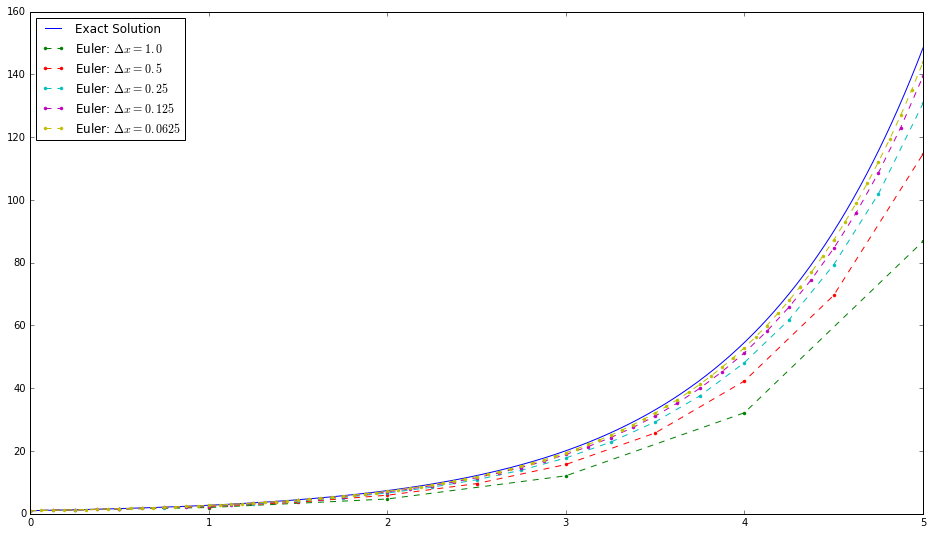

In [30]:
plt.figure(figsize=(16,9), dpi=100)
plt.plot(exactXs, exactYs, label='Exact Solution')

dxs = [1/2**i for i in range(5)]
for dx in dxs:
    xs,ys = eulerSolver(f, x_0, y_0, dx)
    plt.plot(xs,ys, '--.',label='Euler: $\\Delta x = {}$'.format(dx))
plt.legend(loc='best')
plt.show()

Notice that as the step size $dx$ decreases our approximation becomes better and better. If we pick it small enough, then the approximation would be indistiguishable from the real solution. In fact it is possible to show that in the limit as $dx$ goes to zero we will arrive at the true solution.

We say Euler's method is a first order method. It has a local error of $O(\Delta x^2)$, and a global error of $O(\Delta x)$. That is to say that the global error on our approximation proportional to the step size. We can do much better than this.

## Fourth Order Runge-Kutta (RK4)

Without going into much (actually any) detail, we will introduce the fourth order Runge-Kutta method.

* $k_1 = f(x_n, y_n)$
* $k_2 = f(x_n + \frac{\Delta x}{2}, y_n + \frac{\Delta x}{2}k_1)$
* $k_3 = f(x_n + \frac{\Delta x}{2}, y_n + \frac{\Delta x}{2}k_2)$
* $k_4 = f(x_n + \Delta x, y_n + \Delta x k_3)$

$y_{n+1} = y_n + \tfrac{\Delta x}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right)$

$x_{n+1} = x_n + \Delta x$

This method is actually a fourth order method, ie the global error is $O(\Delta x^4)$. This means the error goes down much faster; for any given $\Delta x$ we can have error 10,000 times smaller than Euler's method.

Now... We won't impelement this, because scipy has done it for us already.

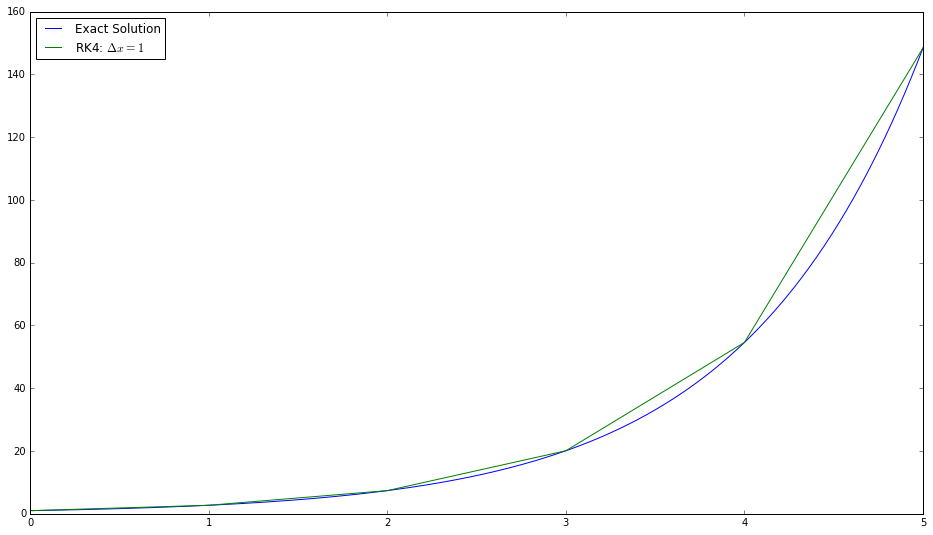

In [28]:
from scipy.integrate import odeint

dx = 1
xs = np.arange(0,5+dx, dx)
ys = odeint(f, y_0, xs)

plt.figure(figsize=(16,9), dpi=100)
plt.plot(exactXs, exactYs, label='Exact Solution')
plt.plot(xs,ys, label='RK4: $\\Delta x = {}$'.format(dx))
plt.legend(loc='best')
plt.show()

Though it looks like it is overestimating, the points RK4 predicts are basically indistinguishable from the real solution. Notice that $\Delta x$ is set to 1, a pretty big step size.

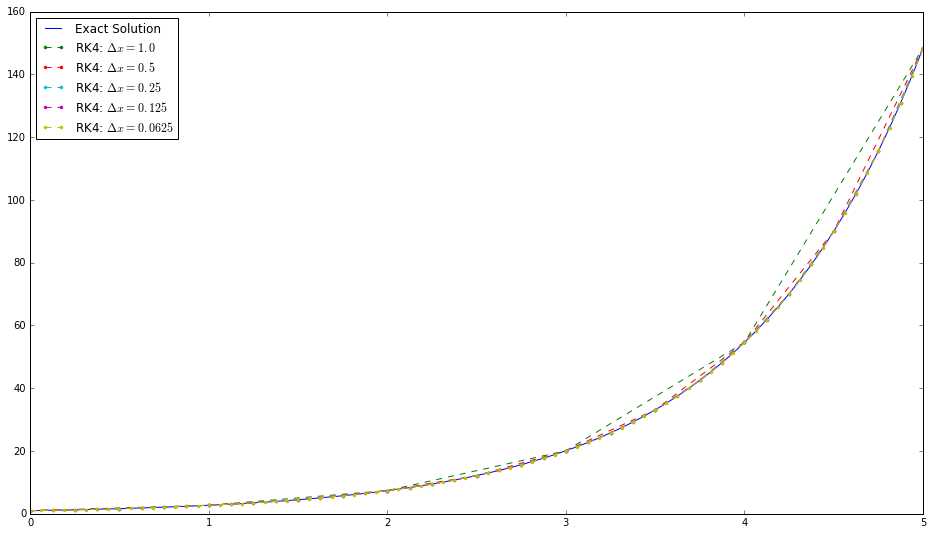

In [29]:
# Now we want to plot the real solution, which is f conviniently
exactXs = np.linspace(0,5,1000)
exactYs = f(None, exactXs)
plt.figure(figsize=(16,9), dpi=100)
plt.plot(exactXs, exactYs, label='Exact Solution')

dxs = [1/2**i for i in range(5)]
for dx in dxs:
    xs = np.arange(0,5+dx,dx)
    ys = odeint(f, y_0, xs)
    plt.plot(xs,ys, '--.',label='RK4: $\\Delta x = {}$'.format(dx))
plt.legend(loc='best')
plt.show()

# Projects

* Let's make a population model. First we'll start with the basics: Let P be the population, and t be time. Then we can say that $\frac{dP}{dt} = r \cdot P$. That is, the rate of population growth depends on the current population times a constant. However, this leads to exponential growth (uncontrolled growth). We can control the growth by adding another term to our differential equation: $\frac{dP}{dt} = rP( 1 - \frac{P}{K})$. We added the term $- r \frac{P^2}{K}$. So as the population increases, eventually the second term will dominate, and turn our population growth into popluation decline. Given $r=1, K=100,000$ and $P(t=0) = 100$, plot the population as a function of time. Use odeint.


* Let's make a more interesting population model. This time we will model two species: predator and prey.
$\frac{d x}{d t} = \alpha x - \beta x y$, 
$\frac{d y}{d t} = \delta x y - \gamma y$.
X is the prey while Y is the predator. Notice that the population of x will grow on its own, but will decrease as more predators and preys exist together. y will decay if left alone (no food), but will increase so long as there is some food available. The difficulty for this problem is that we need to solve both differential equations simultaneously. To do so we make them into a vector: Let $\frac{d \vec P}{d t}$ be a vector where the first component is prey population and the second component is the predator population. Now we make a function to implement this, which returns the vector of derivatives. Odeint can then solve this system. The solution will have two components, one for each DE. Using $\alpha = 2, \beta = 1,  \delta = 0.25,  \gamma = 1$, and $x(t=0) = 10,000$, $y(t=0) = 100$ solve the system using odeint

* Solve the Newton's law example from the beginning of this lesson, $\frac{d x^2}{d t^2} = - \frac{k}{m} x$. The difficulty here is that we have a second order differential equation. We can however turn this into two first order DEs, which we can solve as in project 2. Let $v(t) = \frac{d x}{d t}$. Then we can write $\frac{d v}{d t} = - \frac{k}{m} x$ and $\frac{d x}{d t} = v$. So now we have a system of two first order DEs. By making a vector equation out of this, we can solve the system. Using $-\frac{k}{m} = 1$ and $x(t=0) = 1$, $v(t=0) = 0$ solve the system using odeint.